In [1]:
from hcipy import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# For notebook animations
from matplotlib import animation
from IPython.display import HTML

mpl.rcParams['figure.dpi'] = 100

pupil_grid = make_pupil_grid(256, 1.5)
focal_grid = make_focal_grid(8, 12)
prop = FraunhoferPropagator(pupil_grid, focal_grid)

C:\Users\alexe\AppData\Local\Temp\ipykernel_33248\1521977455.py:1: DeprecationWarning: circular_aperture is deprecated. Its new name is make_circular_aperture.
  aperture = evaluate_supersampled(circular_aperture(1), pupil_grid, 4)
C:\Users\alexe\AppData\Local\Temp\ipykernel_33248\1521977455.py:2: DeprecationWarning: circular_aperture is deprecated. Its new name is make_circular_aperture.
  lyot_mask = evaluate_supersampled(circular_aperture(0.95), pupil_grid, 4)


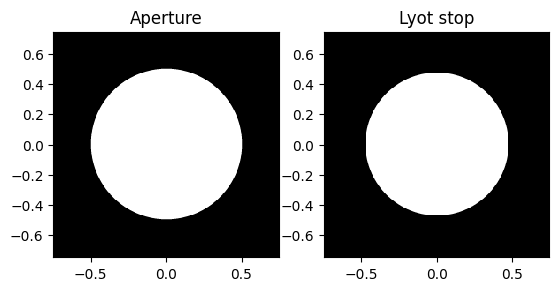

In [2]:
aperture = evaluate_supersampled(circular_aperture(1), pupil_grid, 4)
lyot_mask = evaluate_supersampled(circular_aperture(0.95), pupil_grid, 4)

plt.subplot(1,2,1)
plt.title('Aperture')
imshow_field(aperture, cmap='gray')
plt.subplot(1,2,2)
plt.title('Lyot stop')
imshow_field(lyot_mask, cmap='gray')
plt.show()

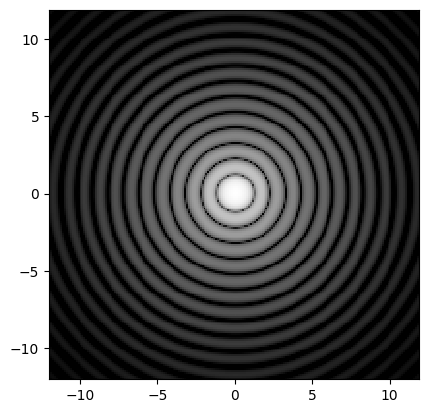

In [3]:
# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Grays_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'berlin', 'berlin_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_grey_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gist_yerg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'grey_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'managua', 'managua_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'vanimo', 'vanimo_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

wf = Wavefront(aperture)
img_ref = prop(wf).intensity

imshow_field(np.log10(img_ref / img_ref.max()), vmin=-5, cmap='Greys_r')
plt.show()

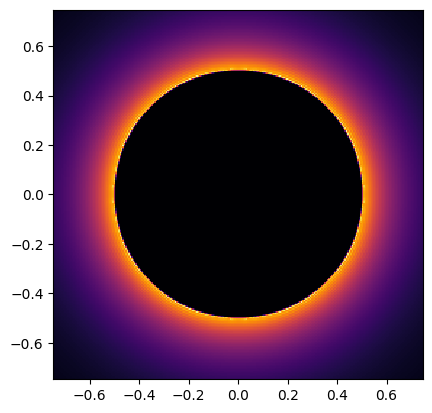

In [4]:
charge = 2
coro = VortexCoronagraph(pupil_grid, charge)
lyot_stop = Apodizer(lyot_mask)

wf = Wavefront(aperture)
lyot_plane = coro(wf)

imshow_field(lyot_plane.intensity, cmap='inferno')
plt.show()

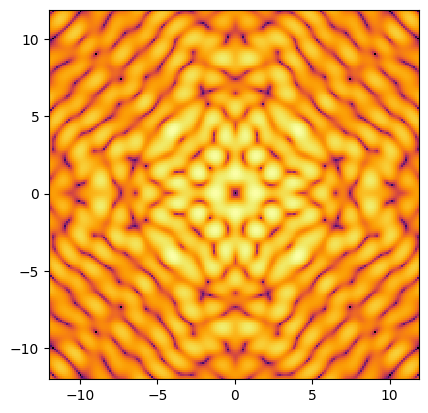

In [5]:
post_lyot_mask = lyot_stop(lyot_plane)
img = prop(post_lyot_mask).intensity

imshow_field(np.log10(img / img.max()), vmin=-5, vmax=0, cmap='inferno')
plt.show()

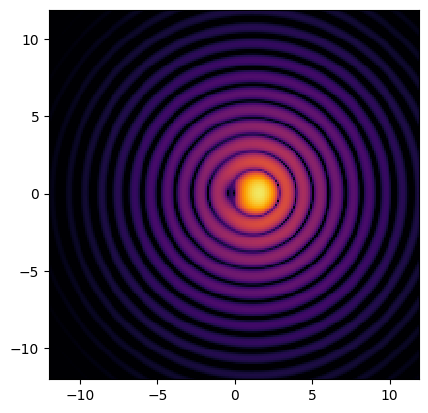

In [30]:
wf = Wavefront(aperture * np.exp(2j * np.pi * pupil_grid.x * 1.5))
img = prop(lyot_stop(coro(wf))).intensity

imshow_field(np.log10(img / img_ref.max()), vmin=-5, vmax=0, cmap='inferno')
plt.show()

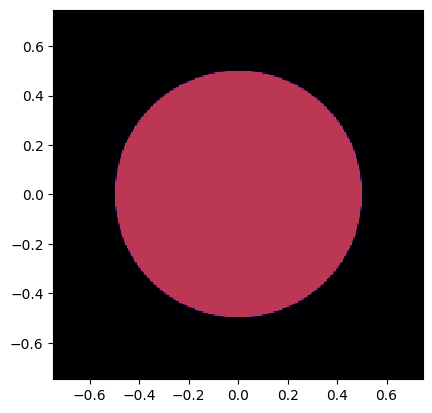

In [26]:
lyot = coro(wf)

imshow_field(lyot.intensity, vmax=2, cmap='inferno')
plt.show()

In [8]:
def create_offaxis_animation(coro):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Lyot plane')
    im1 = imshow_field(lyot_plane.intensity, vmax=1, cmap='inferno')
    plt.subplot(1,2,2)
    plt.title('Science image plane')
    im2 = imshow_field(np.log10(img / img_ref.max()), vmin=-5, vmax=0, cmap='inferno')
    plt.close(fig)

    def animate(angular_separation):
        wf = Wavefront(aperture * np.exp(2j * np.pi * pupil_grid.x * angular_separation))
        lyot = coro(wf)
        img = prop(lyot_stop(lyot))

        im1.set_data(*pupil_grid.separated_coords, lyot.intensity.shaped)
        im2.set_data(*focal_grid.separated_coords, np.log10(img.intensity.shaped / img_ref.max()))

        return [im1, im2]

    angular_separations = np.linspace(-5, 5, 51)
    anim = animation.FuncAnimation(fig, animate, angular_separations, interval=160, blit=True)
    anim.save('offaxis_animation.gif', writer=animation.PillowWriter(fps=6))
    
    return HTML(anim.to_html5_video())

create_offaxis_animation(coro)

RuntimeError: Requested MovieWriter (ffmpeg) not available

C:\Users\alexe\AppData\Local\Temp\ipykernel_18288\1410318723.py:6: DeprecationWarning: circular_aperture is deprecated. Its new name is make_circular_aperture.
  aperture = evaluate_supersampled(circular_aperture(1), pupil_grid, 4)
C:\Users\alexe\AppData\Local\Temp\ipykernel_18288\1410318723.py:7: DeprecationWarning: circular_aperture is deprecated. Its new name is make_circular_aperture.
  lyot_mask = evaluate_supersampled(circular_aperture(0.95), pupil_grid, 4)


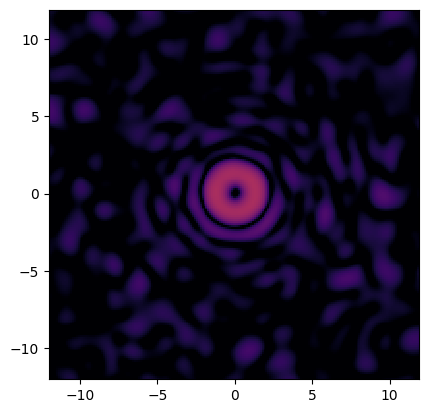

In [ ]:
pupil_grid = make_pupil_grid(256, 1.5)
focal_grid = make_focal_grid(8, 12)
prop = FraunhoferPropagator(pupil_grid, focal_grid)
mpl.rcParams['figure.dpi'] = 100

aperture = evaluate_supersampled(circular_aperture(1), pupil_grid, 4)
lyot_mask = evaluate_supersampled(circular_aperture(0.95), pupil_grid, 4)

wf = Wavefront(aperture)

charge = 2
coro = VortexCoronagraph(pupil_grid, charge)
lyot_stop = Apodizer(lyot_mask)

wf = Wavefront(aperture * np.exp(2j * np.pi * pupil_grid.x * 0))
# Create a 2D Gaussian centered on the pupil to weight the noise
x, y = pupil_grid.separated_coords
sigma = 0.3  # adjust for desired focus
gaussian_weight = np.array([np.exp(-(x2**2 + y2**2) / (2 * sigma**2)) for x2 in x for y2 in y])
gaussian_weight = gaussian_weight.ravel()

random_aberration = 1 * np.random.randn(len(pupil_grid)) * gaussian_weight  # radians
wf.electric_field *= np.exp(1j * random_aberration)

lyot_plane = coro(wf)

post_lyot_mask = lyot_stop(lyot_plane)
img = prop(post_lyot_mask).intensity
img_ref = prop(wf).intensity


imshow_field(np.log10(img / img_ref.max()), vmin=-5, vmax=0, cmap='inferno')
plt.show()


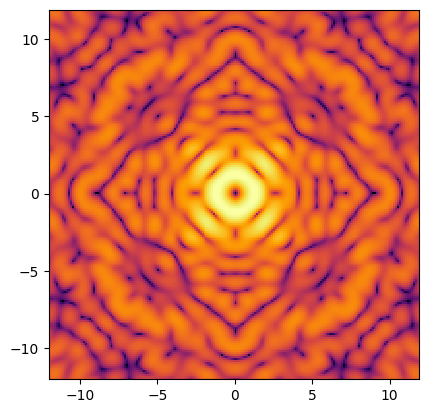

In [ ]:
# Create pupil grid and aperture
focal_grid = make_focal_grid(8, 12)
pupil_grid = make_pupil_grid(256, 1)
prop = FraunhoferPropagator(pupil_grid, focal_grid)

aperture = make_circular_aperture(1)(pupil_grid)
lyot_mask = make_circular_aperture(0.95)(pupil_grid)

lyot_stop = Apodizer(lyot_mask)

charge = 2
coro = VortexCoronagraph(pupil_grid, charge)

# Create a wavefront
wf = Wavefront(aperture)

#random_aberration = 0 * np.random.randn(len(pupil_grid))  # radians
#wf.electric_field *= np.exp(1j * random_aberration)

lyot_plane = coro(wf) 
post_lyot_mask = lyot_stop(lyot_plane)

img = prop(post_lyot_mask).intensity

img_ref = prop(lyot_stop(coro(wf))).intensity

imshow_field(np.log10(img / img_ref.max()), vmin=-5, vmax=0, cmap='inferno')
plt.show()